In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'Adsız klasör'			      Wine.ipynb
'Colab Notebooks'		      winemag-data_first150k.csv
 protein_ortak.ipynb		     "Wine's Data - PreProcessing.ipynb"
 VerilerinIncelenmesi-Oğuzhan.ipynb


In [2]:
import pandas as pd
wine = pd.read_csv("/content/drive/My Drive/winemag-data_first150k.csv")
wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# New Section

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
wine.shape

(150930, 11)

In [ ]:
wine.describe().T # describe stats (betimleyici istatistikler)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150930.0,75464.500000,43569.882402,0.0,37732.25,75464.5,113196.75,150929.0
points,150930.0,87.888418,3.222392,80.0,86.00,88.0,90.00,100.0
price,137235.0,33.131482,36.322536,4.0,16.00,24.0,40.00,2300.0


In [ ]:
wine.info() # info about dataframe (dataframe hakkinda bilgi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


* **Country: wine is from(sarabin nereden geldigi)**
* **Description: A few sentences about wine's taste, smell, look, feel, etc.(sarabin tadi, kokusu, gorunumu ile alakali bilgiler)**
* **Designation: Vineyard, where the grapes that made the wine are from (uzum sarabinin yapildigi baglar)**
* **Points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (sarabin Enstitu tarafindan 1-100 arasi puanlandirilmasi)**
* **Price: Price of wines (bir sise sarabin fiyati)**
* **Province: The province or state that the wine is from (Sarabin bulundugu il yada eyalet)**
* **region_1: The wine growing area in a province or state (bir eyaletteki sarap yetistirme alani)**
* **region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank (Sarap yetistirme alani icerisinde bazi bolgeler vardir ama bu bazen bos olabilir duruma bagli anlasilan)**
* **Variety: The type of grapes used to make the wine (sarabi yapmak icin kullanilan uzum turu)**

In [3]:
# we should drop unimportant columns (onemsiz sutunlari dusurelim)

wine.drop(labels=["Unnamed: 0"],axis=1,inplace=True)


In [ ]:
# same time we'll check missing values (ayni zamanda eksik degerlere de bakalim)
wine.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


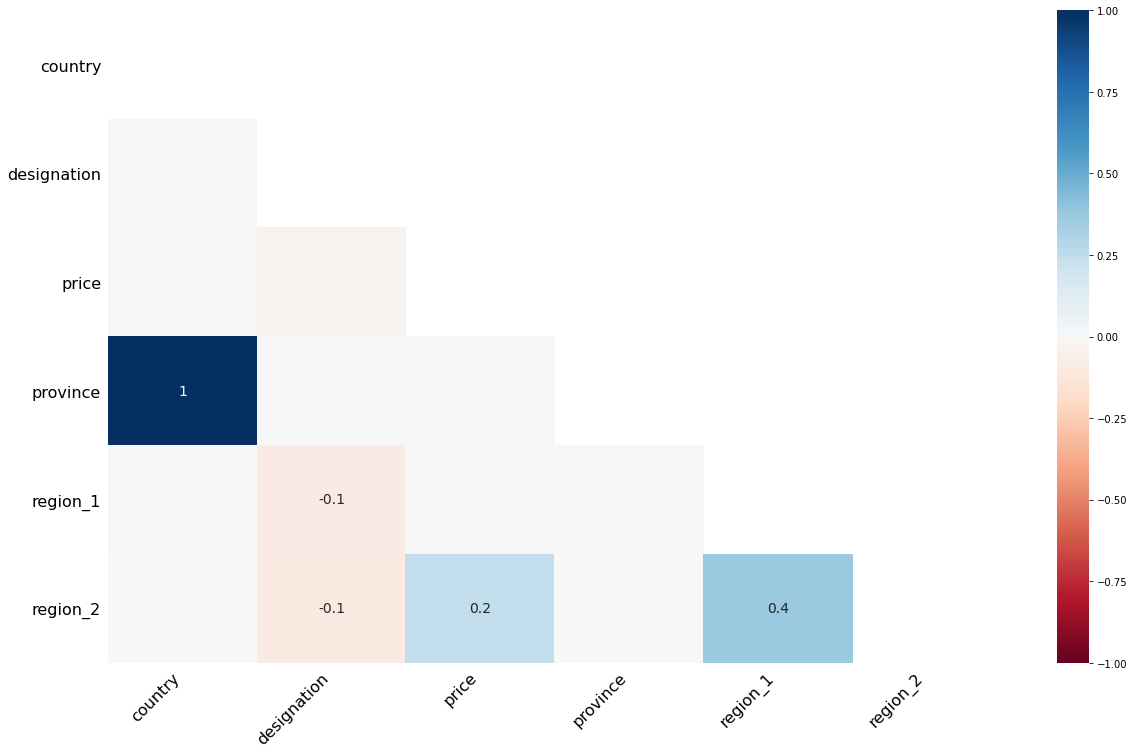

In [ ]:
# will see missing values corelation
import missingno as msno

msno.heatmap(wine)

# now we are seeing country and province variables are related, in this case we shouldn't fill this two variables' missing values.
# Beacuse that missing values aren't coincidental. if we fill in missing values(country & province),it will be structural problems. 
# (kayip degerler arasinda yapisal sorunlar var mi onlara baktik, 2 adet degisken rassal olmayan bir eksiklik gorduk)
# (bu durumda bu iki degiskeni doldurmak bize problem cikartacaktir.)

In [ ]:
# if we want use more numeric variables for filling, before fill missing values we need to transformation some variables.
# Because our variables are many of object type.
# (eger istersek tahmine dayali yontemelerde kullanmak uzere dummy degisken olusturabiliriz)

df_one_hot = pd.get_dummies(wine, columns=["country","province"], prefix=["new_country","new_province"])
df_one_hot.head(3)

,description,designation,points,price,region_1,region_2,variety,winery,new_country_Albania,new_country_Argentina,new_country_Australia,new_country_Austria,new_country_Bosnia and Herzegovina,new_country_Brazil,new_country_Bulgaria,new_country_Canada,new_country_Chile,new_country_China,new_country_Croatia,new_country_Cyprus,new_country_Czech Republic,new_country_Egypt,new_country_England,new_country_France,new_country_Georgia,new_country_Germany,new_country_Greece,new_country_Hungary,new_country_India,new_country_Israel,new_country_Italy,new_country_Japan,new_country_Lebanon,new_country_Lithuania,new_country_Luxembourg,new_country_Macedonia,new_country_Mexico,new_country_Moldova,new_country_Montenegro,new_country_Morocco,...,new_province_Viile Carasului,new_province_Viile Timis,new_province_Viile Timisului,new_province_Villány,new_province_Vin de Pays d'Imathia,new_province_Vin de Pays de Macédoine,new_province_Vin de Pays de Velvendo,new_province_Vinho Espumante,new_province_Vinho Espumante de Qualidade,new_province_Vinho Licoroso,new_province_Vinho Verde,new_province_Vinho da Mesa,new_province_Vino da Tavola della Svizzera Italiana,new_province_Vipavska Dolina,new_province_Virginia,new_province_Vânju Mare,new_province_Wachau,new_province_Wagram,new_province_Wagram-Donauland,new_province_Waiheke Island,new_province_Waipara,new_province_Waipara Valley,new_province_Wairarapa,new_province_Wairau Valley,new_province_Waitaki Valley,new_province_Walker Bay,new_province_Washington,new_province_Washington-Oregon,new_province_Weinland Österreich,new_province_Weinviertel,new_province_Wellington,new_province_Western Australia,new_province_Western Cape,new_province_Wiener Gemischter Satz,new_province_Württemberg,new_province_Zenata,new_province_Zitsa,new_province_Österreichischer Sekt,new_province_Štajerska,new_province_Župa
0,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we'll work on a few important variables. But don't forget that we haven't knowledge about wine production. Just we use to analytics skills.
# (birkac onemli degisken ile uzerinde calisacagiz ve unutmamak lazim bizim sarap uretimi hakkinda bilgimiz yok, analitik dusunecegiz.)
# First variable is Price (ilk degiskenimiz Fiyat yani Price)
# use the KNN 
# and we dont use the dummy variables because it's take it long time. for this reason we'll use just 2 numeric variables(price,point)
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

d_f = wine.select_dtypes(include=["float64","int64"])

imp = KNNImputer(n_neighbors=3,weights="uniform" )
dff = imp.fit_transform(d_f)
dff = pd.DataFrame(dff)

In [ ]:
dff.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
# fill with categories' class (kategorik kirilimlara gore doldurmak)

wine["price"].fillna(wine.groupby("country")["price"].transform("mean"))


0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [ ]:
# we can use the method of mode for filling object variables (mode yontemi ile kategorik olanlari doldurabiliriz)

wine["region_1"].fillna(wine["region_1"].mode()[0])

0               Napa Valley
1                      Toro
2            Knights Valley
3         Willamette Valley
4                    Bandol
                ...        
150925    Fiano di Avellino
150926            Champagne
150927    Fiano di Avellino
150928            Champagne
150929           Alto Adige
Name: region_1, Length: 150930, dtype: object

In [36]:
# Also we must figure out the outliers (aykiri degiskenleri bulmamiz lazim ve duzenlemeliyiz)
# use the suppression method is possible

wine_1 = wine.select_dtypes(include=["float64","int64"])
wine_1 = wine_1.dropna()
wine_1.head()

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0


In [7]:
wine_1.describe().T

,count,mean,std,min,25%,50%,75%,max
points,137235.0,87.787919,3.221680,80.0,86.0,88.0,90.0,100.0
price,137235.0,33.131482,36.322536,4.0,16.0,24.0,40.0,2300.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


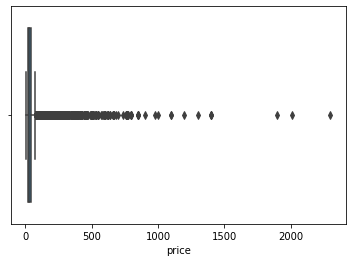

In [5]:
import seaborn as sns
sns.boxplot(wine_1["price"],data = wine_1)

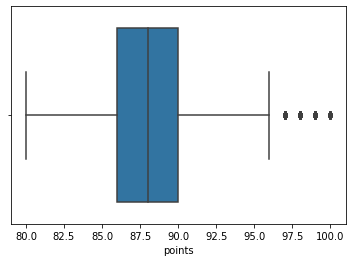

In [13]:
sns.boxplot(wine_1["points"],data=wine_1)

In [47]:
# Now we are calculating Quantiles and we'll use to thIQR method
Q1 = wine_1["price"].quantile(0.25)
Q3 = wine_1["price"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_bound = wine_1["price"] < lower
upper_bound = wine_1["price"] > upper

wine_1["price"][lower_bound] = lower
wine_1["price"][upper_bound] = upper



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
Q1 = wine_1["points"].quantile(0.25)
Q3 = wine_1["points"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_bound = wine_1["points"] < lower
upper_bound = wine_1["points"] > upper

wine_1["points"][lower_bound] = lower
wine_1["points"][upper_bound] = upper

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# Let's look again boxplots


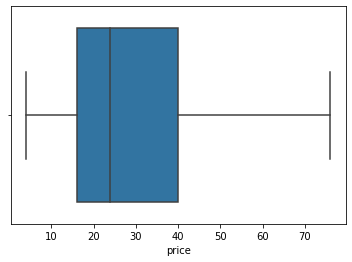

In [48]:
sns.boxplot(wine_1["price"],data = wine_1)

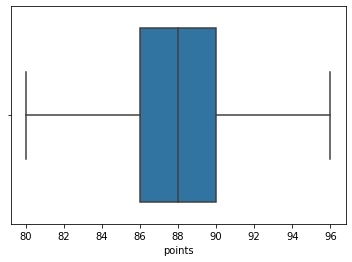

In [49]:
sns.boxplot(wine_1["points"],data=wine_1)